In [1]:
# Set up packages for lecture. Don't worry about understanding this code, but
# make sure to run it if you're following along.
import numpy as np
import babypandas as bpd
import pandas as pd
from matplotlib_inline.backend_inline import set_matplotlib_formats
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation, PillowWriter
from scipy import stats
set_matplotlib_formats("svg")
plt.style.use('ggplot')

np.set_printoptions(threshold=20, precision=2, suppress=True)
pd.set_option("display.max_rows", 7)
pd.set_option("display.max_columns", 8)
pd.set_option("display.precision", 2)

# Animations
from IPython.display import display, HTML, IFrame, clear_output
import ipywidgets as widgets

# Demonstration code
def r_scatter(r):
    "Generate a scatter plot with a correlation approximately r"
    x = np.random.normal(0, 1, 1000)
    z = np.random.normal(0, 1, 1000)
    y = r * x + (np.sqrt(1 - r ** 2)) * z
    plt.scatter(x, y)
    plt.xlim(-4, 4)
    plt.ylim(-4, 4)
    
def show_scatter_grid():
    plt.subplots(1, 4, figsize=(10, 2))
    for i, r in enumerate([-1, -2/3, -1/3, 0]):
        plt.subplot(1, 4, i+1)
        r_scatter(r)
        plt.title(f'r = {np.round(r, 2)}')
    plt.show()
    plt.subplots(1, 4, figsize=(10, 2))
    for i, r in enumerate([1, 2/3, 1/3]):
        plt.subplot(1, 4, i+1)
        r_scatter(r)
        plt.title(f'r = {np.round(r, 2)}')
    plt.subplot(1, 4, 4)
    plt.axis('off')
    plt.show()

# Lecture 24 – Correlation

## DSC 10, Fall 2022

### Announcements

- Homework 7 is due **tomorrow at 11:59pm**.
- Lab 8 is due on **Saturday 11/26 at 11:59pm**.
- The Final Project is due on **Tuesday 11/29 at 11:59pm**.
- Suraj's lecture section (C00) is not meeting on Wednesday 11/23 or Monday 11/28. 
    - Attend and/or watch the podcasts of any other lecture section on those days.
    - Try to attend the earlier sections, since they have more space.

### Agenda

- Recap: Statistical inference.
- Association.
- Correlation.
- Regression.

## Recap: Statistical inference

### Four big ideas in statistical inference

Every statistical test and simulation we've run in the second half of the class is related to one of the following four ideas. To solidify your understanding of what we've done, it's a good idea to review past lectures and assignments and see how what we did in each section relates to one of these four ideas.

- To test whether a sample came from a known population distribution, use "standard" hypothesis testing. 

- To test whether two samples came from the same unknown population distribution, use permutation testing.

- To estimate a population parameter given a single sample, construct a confidence interval using bootstrapping (for most statistics) or the CLT (for the sample mean).

- To test whether a population parameter is equal to a particular value, $x$, construct a confidence interval using bootstrapping (for most statistics) or the CLT (for the sample mean), and check whether $x$ is in the interval.

### Recent events

<center><img src="data/tweet.png" width=40%></center>

Questions to think about:

- Is the set of Twitter users that follow Elon Musk a random sample of all Twitter users?

- What does statistical significance mean in this context? How is this related to our "Choosing sample sizes" example from Lecture 23?

## Association

### Prediction

- Suppose we have a dataset with at least two numerical variables.

- We're interested in **predicting** one variable based on another:
    - Given my education level, what is my income?
    - Given my height, how tall will my kid be as an adult?
    - Given my age, how many countries have I visited?

- To do this effectively, we need to first observe a pattern between the two numerical variables.

- To see if a pattern exists, we'll need to draw a scatter plot.

### Association

- In Lecture 2, we said "association is another term for "any relation" or "link" 🔗."

- In this context, an **association** is any relationship or link between two variables in a **scatter plot**. Associations can be linear or non-linear.

- If two variables have a positive association ↗️, then as one variable increases, the other tends to increase.
- If two variables have a negative association ↘️, then as one variable increases, the other tends to decrease.

- As we saw in Lecture 2, association $\neq$ causation!
    - However, association is enough to let us make predictions.

### Example: Hybrid cars 🚗

In [2]:
hybrid = bpd.read_csv('data/hybrid.csv')
hybrid

,vehicle,year,price,acceleration,mpg,class
0,Prius (1st Gen),1997,24509.74,7.46,41.26,Compact
1,Tino,2000,35354.97,8.20,54.10,Compact
2,Prius (2nd Gen),2000,26832.25,7.97,45.23,Compact
...,...,...,...,...,...,...
150,C-Max Energi Plug-in,2013,32950.00,11.76,43.00,Midsize
151,Fusion Energi Plug-in,2013,38700.00,11.76,43.00,Midsize
152,Chevrolet Volt,2013,39145.00,11.11,37.00,Compact


### `'acceleration'` and `'price'`

Is there an association between these two variables? If so, what kind?

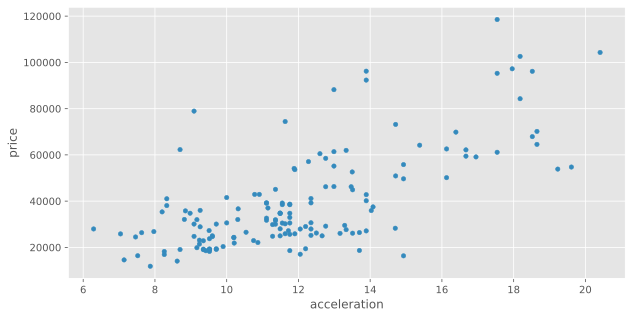

In [3]:
hybrid.plot(kind='scatter', x='acceleration', y='price', figsize=(10, 5));

### `'mpg'` and `'price'`

Is there an association between these two variables? If so, what kind?

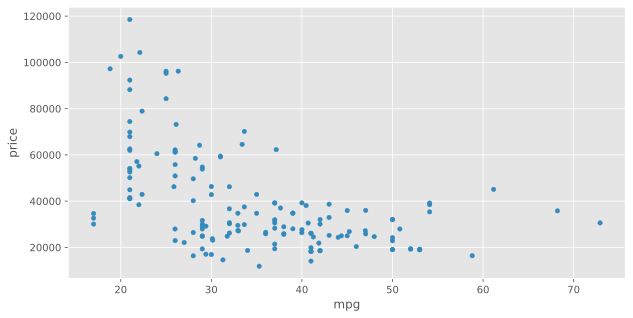

In [4]:
hybrid.plot(kind='scatter', x='mpg', y='price', figsize=(10, 5));

**Observations:**
- There is an association – cars with better fuel economy tended to be cheaper.
    - Why do we think that is? 🤔
- The association looks more curved than linear. 
    - It may roughly follow $y \approx \frac{1}{x}$.
   

### Linear changes in units
- A linear change in units doesn't change the shape of the plot, it only changes the scale of the plot.
    - Linear change means adding or subtracting a constant, and multiplying or dividing by a constant.

- In other words, instead of plotting price in _dollars_ and fuel economy in _miles per gallon_, we can plot price in _Yen (🇯🇵)_ and fuel economy in _kilometers per liter_ and the plot would look the same, just with different axes:

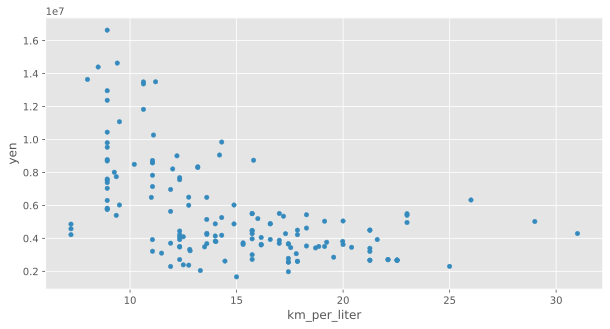

In [5]:
hybrid.assign(
    km_per_liter=hybrid.get('mpg') * 0.425144,
    yen=hybrid.get('price') * 140.34 
).plot(kind='scatter', x='km_per_liter', y='yen', figsize=(10, 5));

### Converting columns to standard units
- Recall: Suppose $x$ is a numerical variable, and $x_i$ is one value of that variable. To convert $x_i$ to standard units,
$$x_{i \: \text{(su)}} = \frac{x_i - \text{mean of $x$}}{\text{SD of $x$}}$$

- Converting columns to standard units makes different scatter plots comparable, by putting the $x$ and $y$ axes on the **same scale**.
    - Both axes measure the number of standard deviations above the mean.

- Converting columns to standard units doesn't change shape of the scatter plot, because the conversion is linear.

In [6]:
def standard_units(any_numbers):
    "Convert any array of numbers to standard units."
    any_numbers = np.array(any_numbers)
    return (any_numbers - any_numbers.mean()) / np.std(any_numbers)

In [7]:
def standardize(df):
    """Return a DataFrame in which all columns of df are converted to standard units."""
    df_su = bpd.DataFrame()
    for column in df.columns:
        df_su = df_su.assign(**{column + ' (su)': standard_units(df.get(column))})
    return df_su

### Standard units for hybrid cars
For a given pair of variables:
- Which cars are average in both variables?
- Which cars are well above or well below average in both variables?

In [8]:
hybrid_su = standardize(hybrid.get(['price', 'acceleration', 'mpg'])).assign(vehicle=hybrid.get('vehicle'))
hybrid_su

,price (su),acceleration (su),mpg (su),vehicle
0,-6.94e-01,-1.54,0.59,Prius (1st Gen)
1,-1.86e-01,-1.28,1.76,Tino
2,-5.85e-01,-1.36,0.95,Prius (2nd Gen)
...,...,...,...,...
150,-2.98e-01,-0.07,0.75,C-Max Energi Plug-in
151,-2.90e-02,-0.07,0.75,Fusion Energi Plug-in
152,-8.17e-03,-0.29,0.20,Chevrolet Volt


### `'acceleration'` and `'price'`

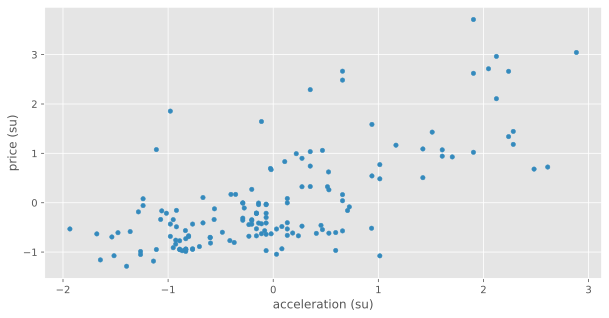

In [9]:
hybrid_su.plot(kind='scatter', x='acceleration (su)', y='price (su)', figsize=(10, 5));

Which cars have `'acceleration'`s and `'price'`s that are more than 2 SDs above average?

In [10]:
hybrid_su[(hybrid_su.get('acceleration (su)') > 2) &
          (hybrid_su.get('price (su)') > 2)]

,price (su),acceleration (su),mpg (su),vehicle
47,2.71,2.05,-1.46,ActiveHybrid X6
60,3.04,2.88,-1.16,ActiveHybrid 7
95,2.96,2.12,-1.35,ActiveHybrid 7i
146,2.11,2.12,-0.90,ActiveHybrid 7L
147,2.66,2.24,-0.90,Panamera S


### `'mpg'` and `'price'`

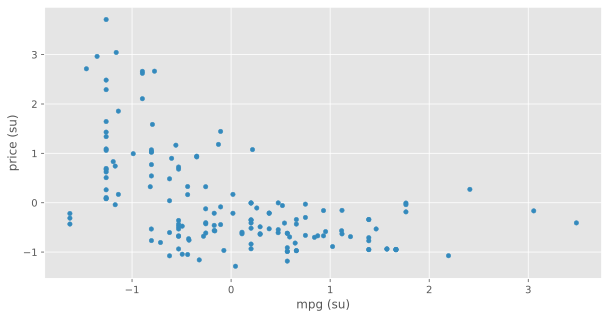

In [11]:
hybrid_su.plot(kind='scatter', x='mpg (su)', y='price (su)', figsize=(10, 5));

Which cars have close to average `'mpg'`s and close to average `'price'`s?

In [12]:
hybrid_su[(hybrid_su.get('mpg (su)') <= 0.3) &
          (hybrid_su.get('mpg (su)') >= -0.3) &
          (hybrid_su.get('price (su)') <= 0.3) &
          (hybrid_su.get('price (su)') >= -0.3)]

,price (su),acceleration (su),mpg (su),vehicle
10,-1.24e-01,-0.56,-0.26,Escape
22,-2.13e-01,-1.02,-0.17,Mercury Mariner
57,-8.47e-02,0.72,-0.11,Audi Q5
...,...,...,...,...
70,-2.14e-01,-0.07,0.02,HS 250h
102,-2.69e-03,-0.29,0.20,Chevrolet Volt
152,-8.17e-03,-0.29,0.20,Chevrolet Volt


### Observation on associations in standard units
- If two variables are positively associated  ↗️,
    - their high, positive values in standard units are typically seen together, and
    - their low, negative values are typically seen together as well.

- If two variables are negatively associated ↘️,
    - high, positive values of one are typically coupled with low, negative values of the other.


- If two variables aren't associated, there should be no such pattern.

When there is a positive association, most data points fall in the lower left and upper right quadrants.

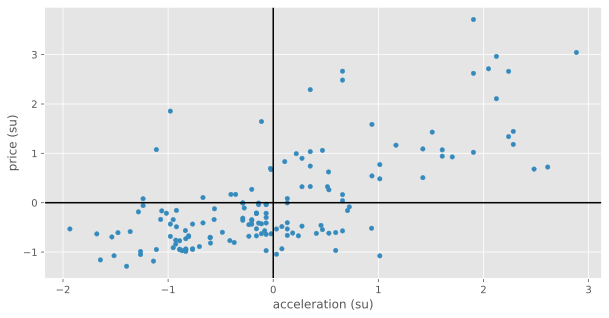

In [13]:
hybrid_su.plot(kind='scatter', x='acceleration (su)', y='price (su)', figsize=(10, 5))
plt.axvline(0, color='black');
plt.axhline(0, color='black');

When there is a negative association, most data points fall in the upper left and lower right quadrants.

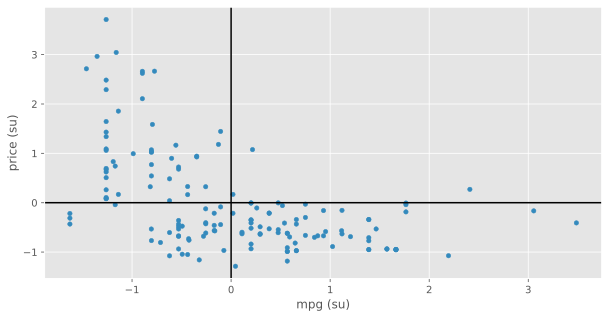

In [14]:
hybrid_su.plot(kind='scatter', x='mpg (su)', y='price (su)', figsize=(10, 5))
plt.axvline(0, color='black');
plt.axhline(0, color='black');

## Correlation

### Definition: Correlation coefficient

The correlation coefficient $r$ of two variables $x$ and $y$ is defined as the 
- **average** value of the 
- **product** of $x$ and $y$
- when both are measured in **standard units**.

If `x` and `y` are two Series or arrays, 
```py
r = (x_su * y_su).mean()
```
where `x_su` and `y_su` are `x` and `y` converted to standard units.

Let's calculate $r$ for `'acceleration'` and `'price'`.

In [15]:
hybrid_su

,price (su),acceleration (su),mpg (su),vehicle
0,-6.94e-01,-1.54,0.59,Prius (1st Gen)
1,-1.86e-01,-1.28,1.76,Tino
2,-5.85e-01,-1.36,0.95,Prius (2nd Gen)
...,...,...,...,...
150,-2.98e-01,-0.07,0.75,C-Max Energi Plug-in
151,-2.90e-02,-0.07,0.75,Fusion Energi Plug-in
152,-8.17e-03,-0.29,0.20,Chevrolet Volt


In [16]:
r_acc_price = (hybrid_su.get('acceleration (su)') * hybrid_su.get('price (su)')).mean()
r_acc_price

0.6955778996913982

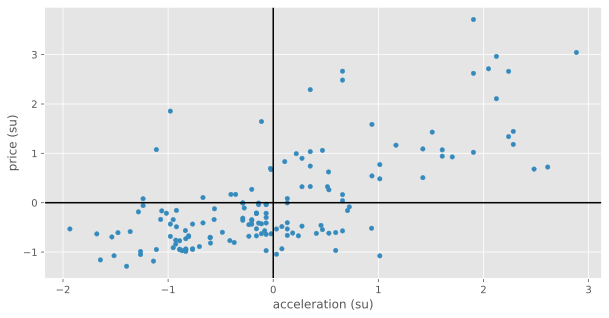

In [17]:
hybrid_su.plot(kind='scatter', x='acceleration (su)', y='price (su)', figsize=(10, 5))
plt.axvline(0, color='black');
plt.axhline(0, color='black');

Note that the correlation is positive, and most data points fall in the lower left and upper right quadrants!

Let's now calculate $r$ for `'mpg'` and `'price'`.

In [18]:
hybrid_su

,price (su),acceleration (su),mpg (su),vehicle
0,-6.94e-01,-1.54,0.59,Prius (1st Gen)
1,-1.86e-01,-1.28,1.76,Tino
2,-5.85e-01,-1.36,0.95,Prius (2nd Gen)
...,...,...,...,...
150,-2.98e-01,-0.07,0.75,C-Max Energi Plug-in
151,-2.90e-02,-0.07,0.75,Fusion Energi Plug-in
152,-8.17e-03,-0.29,0.20,Chevrolet Volt


In [19]:
r_mpg_price = (hybrid_su.get('mpg (su)') * hybrid_su.get('price (su)')).mean()
r_mpg_price

-0.5318263633683789

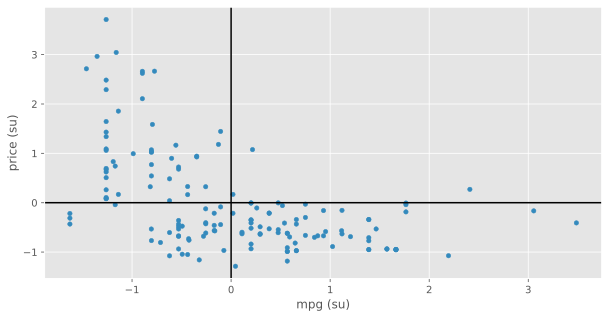

In [20]:
hybrid_su.plot(kind='scatter', x='mpg (su)', y='price (su)', figsize=(10, 5));
plt.axvline(0, color='black');
plt.axhline(0, color='black');

Note that the correlation is negative, and most data points fall in the upper left and lower right quadrants!

### The correlation coefficient, $r$

- $r$ measures how clustered points are around a straight line – **it measures linear association**.
    - If two variables are correlated, it means they are linearly associated.



- $r$ is always between $-1$ and $1$.
    - If $r = 1$, the scatter plot is a line of slope 1.
    - If $r = -1$, the scatter plot is a line of slope -1.
    - If $r = 0$, there is no linear association (_uncorrelated_).

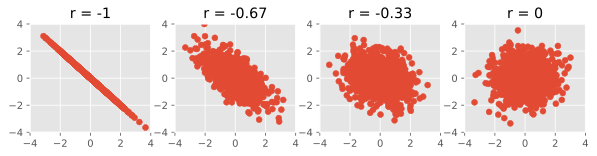

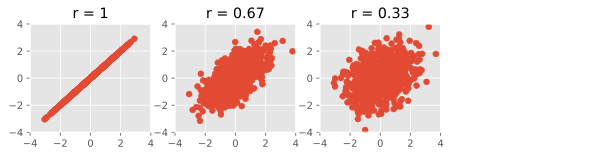

In [21]:
show_scatter_grid()

- $r$ is computed based on standard units.
    - The correlation between price in _dollars_ and fuel economy in _miles per gallon_ is the same as the correlation between price in _Yen_ and fuel economy in _kilometers per liter_.

- $r$ quantifies the **predictive power** of the relationship between two variables. 
   - If $r$ is close to $1$ or $-1$ we can predict one variable from the other quite accurately.
   - If $r$ is close to $0$, we cannot make good predictions.

### Concept Check ✅ – Answer at [cc.dsc10.com](http://cc.dsc10.com) 

Which of the following does the scatter plot below show?

- A. Association and correlation
- B. Association but not correlation
- C. Correlation but not association
- D. Neither association nor correlation

In [ ]:
x2 = bpd.DataFrame().assign(
    x=np.arange(-6, 6.1, 0.5), 
    y=np.arange(-6, 6.1, 0.5) ** 2
)
x2.plot(kind='scatter', x='x', y='y', figsize=(10, 5));

<details><summary>Click <b>here</b> to see the answer <b>after</b> trying it yourself.</summary>

B. Association but not correlation
    
Since there is a pattern in the scatter plot of $x$ and $y$, there is an association between $x$ and $y$. However, correlation refers to <b>linear</b> association, and there is no linear association between $x$ and $y$. The relationship between $x$ and $y$ is actually $y = x^2$. Even though the association between $x$ and $y$ is very strong, the association cannot be described by a linear function because as $x$ increases, $y$ first decreases, and then increases. 
    
The correlation ($r$) between $x$ and $y$ is 0 – try to calculate it yourself!

</details>

## Regression

### Example: Predicting heights  👪 📏

The data below was collected in the late 1800s by [Francis Galton](https://en.wikipedia.org/wiki/Francis_Galton).
- He was a eugenicist and proponent of scientific racism, which is why he collected this data.
- Today, we understand that eugenics is immoral, and that there is no scientific evidence or any other justification for racism.
- Galton is credited with discovering regression using this data.

In [ ]:
galton = bpd.read_csv('data/galton.csv')
galton

### Mothers and sons 👵👨

Let's just consider the relationship between mothers' heights and their adult sons' heights.

In [ ]:
male_children = galton[galton.get('gender') == 'male']
mom_son = bpd.DataFrame().assign(mom = male_children.get('mother'), 
                                 son = male_children.get('childHeight'))
mom_son

In [ ]:
mom_son.plot(kind='scatter', x='mom', y='son', figsize=(10, 5));

### Predicting a son's height based on his mother's height

- The scatter plot demonstrates a positive association between a mother's height (`'mom'`) and her son's height (`'son'`). 
- Let's quantify how *linear* that association is by computing the correlation between `'mom'` and `'son'`. 
- First, we standardize the data.

In [ ]:
mom_son_su = standardize(mom_son)
mom_son_su.plot(kind='scatter', x='mom (su)', y='son (su)', figsize=(10, 5));

In [ ]:
r_mom_son = (mom_son_su.get('mom (su)') * mom_son_su.get('son (su)')).mean()
r_mom_son

### Many possible ways to make predictions

- We want a _simple_ strategy, or rule, for predicting a son's height. 
- The simplest possible prediction strategy just predicts the same value for every son's height, regardless of his mother's height. 
- Some such predictions are better than others.

In [ ]:
def constant_prediction(prediction):
    mom_son_su.plot(kind='scatter', x='mom (su)', y='son (su)', title=f'Predicting a height of {prediction} SUs for all sons', figsize=(10, 5));
    plt.axhline(prediction, color='orange', lw=4);
    plt.xlim(-3, 3)
    plt.show()

prediction = widgets.FloatSlider(value=-3, min=-3,max=3,step=0.5, description='prediction')
ui = widgets.HBox([prediction])
out = widgets.interactive_output(constant_prediction, {'prediction': prediction})
display(ui, out)

- Which of these predictions is the best? 
    - It depends on what we mean by "best," but a natural choice is the rule that predicts 0 standard units, because this corresponds to the mean height of all sons.

In [ ]:
mom_son_su.plot(kind='scatter', x='mom (su)', y='son (su)', title='A good prediction is the mean height of sons (0 SUs)', figsize=(10, 5));
plt.axhline(0, color='orange', lw=4);
plt.xlim(-3, 3);

### Better predictions

- Since there is an association between a son's height and his mother's height, we can make better predictions by allowing our predictions to vary with the mother's height. 
- The simplest way to do this uses a line to make predictions.
- As before, some lines are better than others.

In [ ]:
def linear_prediction(slope):
    x = np.linspace(-3, 3)
    y = x * slope
    mom_son_su.plot(kind='scatter', x='mom (su)', y='son (su)', figsize=(10, 5));
    plt.plot(x, y, color='orange', lw=4)
    plt.xlim(-3, 3)
    plt.title(r"Predicting sons' heights using $\mathrm{son}_{\mathrm{(su)}}$ = " + str(np.round(slope, 2)) + r"$ \cdot \mathrm{mother}_{\mathrm{(su)}}$")
    plt.show()

slope = widgets.FloatSlider(value=0, min=-1,max=1,step=1/6, description='slope')
ui = widgets.HBox([slope])
out = widgets.interactive_output(linear_prediction, {'slope': slope})
display(ui, out)

- Which of these lines is the best? 
     - Again, it depends what we mean by "best," but a good choice is the line that goes through the origin and has a slope of $r$.
     - This line is called the **regression line**, and we'll see next time that it is the "best" line for making predictions in a certain sense.

In [ ]:
x = np.linspace(-3, 3)
y = x * r_mom_son
mom_son_su.plot(kind='scatter', x='mom (su)', y='son (su)', title=r'A good line goes through the origin and has slope $r$', figsize=(10, 5));
plt.plot(x, y, color='orange', label='regression line', lw=4)
plt.xlim(-3, 3)
plt.legend();

### The regression line

- The regression line is the line through $(0,0)$ with slope $r$, when both variables are measured in **standard units**.

<center><img src='data/regression-line.png' width=30%></center>

- We use the regression line to make predictions!

### Making predictions in standard units

<center><img src='data/regression-line.png' width=30%></center>

- If $r = 0.32$, and the given $x$ is $2$ in standard units, then the prediction for $y$ is $0.64$ standard units.
    - The regression line predicts that a mother whose height is $2$ SDs above average has a son whose height is $0.64$ SDs above average.

- If $r = 0.32$, and the given $x$ is $-1$ in standard units, then the prediction for $y$ is $-0.32$ standard units.

- We always _predict_ that a son will be somewhat **closer to average** in height than his mother.
    - This is a consequence of the slope $r$ having magnitude less than 1.
    - This effect is called **regression to the mean**.

- The regression line passes through the origin $(0, 0)$ in standard units. This means that, no matter what $r$ is, **for an average $x$ value, we predict an average $y$ value**.

### Making predictions in original units

Of course, we'd like to be able to predict a son's height in inches, not just in standard units. Given a mother's height in inches, here's how we'll predict her son's height in inches:
1. Convert the mother's height from inches to standard units.

$$x_{i \: \text{(su)}} = \frac{x_i - \text{mean of $x$}}{\text{SD of $x$}}$$

2. Multiply by the correlation coefficient to predict the son's height in standard units.

$$\text{predicted } y_{i \: \text{(su)}} = r \cdot x_{i \: \text{(su)}}$$

3. Convert the son's predicted height from standard units back to inches.

$$\text{predicted } y_i = \text{predicted } y_{i \: \text{(su)}} \cdot \text{SD of $y$} + \text{mean of $y$}$$

In [ ]:
mom_mean = mom_son.get('mom').mean()
mom_sd = np.std(mom_son.get('mom'))
son_mean = mom_son.get('son').mean()
son_sd = np.std(mom_son.get('son'))

In [ ]:
def predict_with_r(mom):
    """Return a prediction for the height of a son whose mother has height mom, 
    using linear regression.
    """
    mom_su = (mom - mom_mean) / mom_sd
    son_su = r_mom_son * mom_su
    return son_su * son_sd + son_mean

In [ ]:
predict_with_r(68)

In [ ]:
predict_with_r(60)

In [ ]:
preds = mom_son.assign(
    predicted_height=mom_son.get('mom').apply(predict_with_r)
)
ax = preds.plot(kind='scatter', x='mom', y='son', title='Regression line predictions, in original units', figsize=(10, 5), label='original data')
preds.plot(kind='line', x='mom', y='predicted_height', ax=ax, color='orange', label='regression line', lw=4);
plt.legend();

### Concept Check ✅ – Answer at [cc.dsc10.com](http://cc.dsc10.com) 

A course has a midterm (mean 80, standard deviation 15) and a really hard final (mean 50, standard deviation 12).

If the scatter plot comparing midterm & final scores for students looks linearly associated with correlation 0.75, then what is the predicted final exam score for a student who received a 90 on the midterm?

- A. 54
- B. 56
- C. 58
- D. 60
- E. 62

## Summary, next time

### Summary

- The correlation coefficient, $r$, measures the linear association between two variables $x$ and $y$.
    - It ranges between -1 and 1.
- When both variables are measured in standard units, the regression line is the straight line passing through $(0, 0)$ with slope $r$. We can use it to make predictions for a $y$ value (e.g. son's height) given an $x$ value (e.g. mother's height).

### Next time

More on regression, including:
  - What is the equation of the regression line in original units (e.g. inches)?
  - In what sense is the regression line the "best" line for making predictions?